In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
from IPython.display import Image
import math

import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', 100)


# Требования: 
- во всех графиках должны быть подписи чере title, legend, etc... 
- Убедитесь, что после сохранения ноутбука графики всё ещё видно, если открыть ноутбук заново, если не видно, то напишите мне @kirizhik 
- Можно баловаться с цветами, чтобы было **K P A C U B O**, но **не вырвеглазно**, пожалуйста

In [98]:
df = pd.read_csv('data.csv', index_col = 0)
for i in df[df['Weight'].isnull()].index:
     df = df.drop(i)
df = df.reset_index(drop = True)
for i in range(df.shape[0]):
    if i not in (df[df['Joined'].isnull()].index):
        df.loc[i, 'Joined'] = int(df['Joined'][i][-4:])
df.head(1)

ID      Name  Age                                           Photo  \
0  158023  L. Messi   31  https://cdn.sofifa.org/players/4/19/158023.png   

  Nationality                                 Flag  Overall  Potential  \
0   Argentina  https://cdn.sofifa.org/flags/52.png       94         94   

           Club                                     Club Logo    Value   Wage  \
0  FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M  €565K   

   Special Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
0     2202           Left                       5.0        4.0          4.0   

        Work Rate Body Type Real Face Position  Jersey Number Joined  \
0  Medium/ Medium     Messi       Yes       RF           10.0   2004   

  Loaned From Contract Valid Until Height  Weight    LS    ST    RS    LW  \
0         NaN                 2021    5'7  159lbs  88+2  88+2  88+2  92+2   

     LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM  \
0  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2  84+2  91+2   

    LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  \
0  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2      84.0   

   Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  \
0       95.0             70.0          90.0     86.0       97.0   93.0   

   FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  \
0        94.0         87.0         96.0          91.0         86.0     91.0   

   Reactions  Balance  ShotPower  Jumping  Stamina  Strength  LongShots  \
0       95.0     95.0       85.0     68.0     72.0      59.0       94.0   

   Aggression  Interceptions  Positioning  Vision  Penalties  Composure  \
0        48.0           22.0         94.0    94.0       75.0       96.0   

   Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0     33.0            28.0           26.0       6.0        11.0       15.0   

   GKPositioning  GKReflexes Release Clause  
0           14.0         8.0        €226.5M

In [3]:
df.shape

(18159, 88)

In [4]:
a = pd.DataFrame(df.dtypes != 'object')
a[a[0] == True].count()

0    43
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18159 entries, 0 to 18158
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18159 non-null  int64  
 1   Name                      18159 non-null  object 
 2   Age                       18159 non-null  int64  
 3   Photo                     18159 non-null  object 
 4   Nationality               18159 non-null  object 
 5   Flag                      18159 non-null  object 
 6   Overall                   18159 non-null  int64  
 7   Potential                 18159 non-null  int64  
 8   Club                      17918 non-null  object 
 9   Club Logo                 18159 non-null  object 
 10  Value                     18159 non-null  object 
 11  Wage                      18159 non-null  object 
 12  Special                   18159 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [6]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [7]:
df[['Wage']].head(10)

Wage
0  €565K
1  €405K
2  €290K
3  €260K
4  €355K
5  €340K
6  €420K
7  €455K
8  €380K
9   €94K

# Заполните пропуски в утверждениях 

- В датасете [88] переменных 

- Из них числовых [43]

# Изучите распределение возростов с помощью Age [px.histogram](https://plotly.com/python/histograms/), изучите [более продвинутые методы](https://plotly.com/python/distplot/) визуализации распределений 

In [8]:
px.histogram(df['Age'])

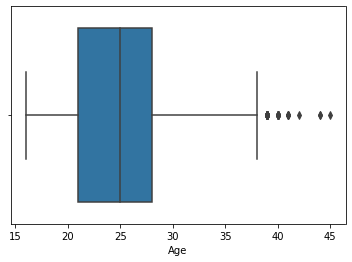

In [9]:
sns.boxplot(x = 'Age', data = df);

# Визуализируйте соотношенеие между левшами и правшами (? сами найдите необходимую колонку в данных, считаем, что левша-правша ~ предпочтительная нога для ударов )

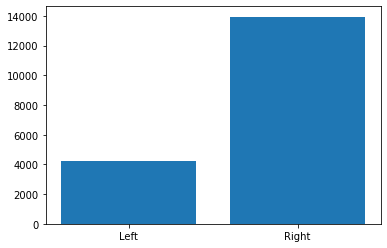

In [10]:
b = df[['ID', 'Preferred Foot']].groupby('Preferred Foot').count().reset_index().rename(columns = {'ID':'count'})
plt.bar(x = b['Preferred Foot'], height = b['count']);

# Визуализируйте Международный Рейтинг футболистов (International Reputation), ассоциирован ли он с национальностью? футбольным клубом? 

![Игроки](Players.png "Title")


In [11]:
df[['Name', 'Nationality', 'Age', 'Overall', 'Potential', 'Club', 'Joined', 'Contract Valid Until', 'Value', 'Wage', 'Special', 'International Reputation']].head(1)

Name Nationality  Age  Overall  Potential          Club Joined  \
0  L. Messi   Argentina   31       94         94  FC Barcelona   2004   

  Contract Valid Until    Value   Wage  Special  International Reputation  
0                 2021  €110.5M  €565K     2202                       5.0

In [12]:
Image(url = 'https://cdn.sofifa.net/players/158/023/22_60.png')

In [13]:
Image(url = 'https://cdn.sofifa.net/teams/73/30.png')

In [14]:
Image(url = 'https://cdn.sofifa.net/flags/ar.png')

# Есть ли зависимость между потенциалом (Potential) и Международным Рейтингом футболистов (International Reputation)? Визуализируте её. Влияет ли на потенциал игровая нога? Почему так может случиться? (картинка в тему)

![Коазуация или корреляция?](causuation.png "???")

In [15]:
# 🤔 угадайте что
# Угадал, 

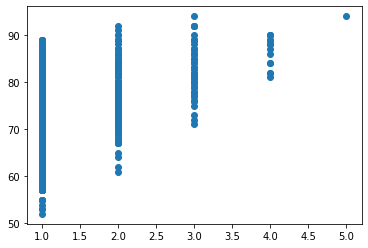

In [16]:
plt.scatter(y = 'Potential', x = 'International Reputation', data = df[df['Preferred Foot'] == 'Left'])

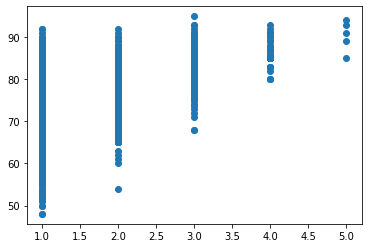

In [17]:
plt.scatter(y = 'Potential', x = 'International Reputation', data = df[df['Preferred Foot'] == 'Right'])

### В целом разницы между правшами и левшами нету, получаеться только что чем выше рейтинг, тем выше медианный и средний потецниал игрвоков с этим рейтингом, также получается чтобы получить определенный рейтинг, нужно иметь потенциал больше определенного показателя

# Теперь пройдёмся по показателям игроков... 
### Есть ли зависимость Выносливости (Stamina) и Силы (Strength) игроков? какая? точно зависимость? 


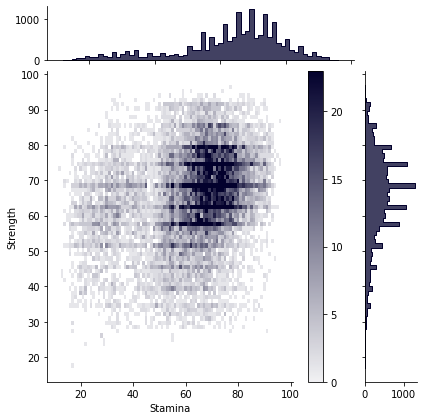

In [24]:
g = sns.JointGrid(data = df, x = 'Stamina', y = 'Strength', marginal_ticks=True)
g.plot_joint(sns.histplot, discrete=(True, False), cmap="light:#03012d", pmax=.8, cbar=True)
g.plot_marginals(sns.histplot, element="step", color="#03012d");

In [25]:
ms = df['Stamina']/df['Strength']
px.histogram(ms,nbins=20)

C:\Users\tim10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



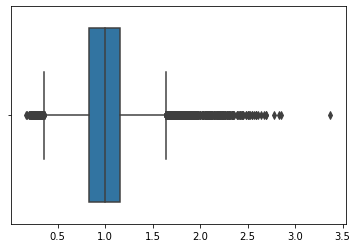

In [26]:
sns.boxplot(ms);

In [27]:
ms = df['Strength']/df['Stamina']
px.histogram(ms,nbins=30)

C:\Users\tim10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

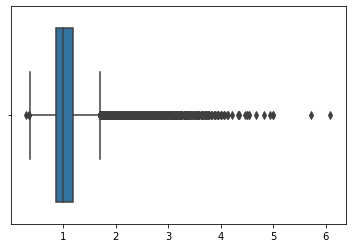

In [28]:
sns.boxplot(ms)

### Получается что чаще всего сила и выносливость примерно равны в промежутке от 60 до 80

# Зависит ли Стоимость игрока стоимость (Value) игрока от его "финтов" (Skill Moves)? 

In [100]:
for i in range(df['Value'].shape[0]):
    ev = df['Value'][i][0]
    kf = df['Value'][i][-1]
    if kf == 'K' or kf == 'M':
        nm = df['Value'][i][1:-1].split('.')
    else:
        nm = df['Value'][i][1:].split('.')
    ch = 0
    if (len(nm) == 2):
        ch = int(nm[0]) + (int(nm[1]) * 1.0) / 10**(len(nm[1]))
    elif (len(nm) == 1):
        ch = int(nm[0])
    mn = 0
    if kf == 'M':
        mn = 1000000
    elif kf == 'K':
        mn = 1000
    df.loc[i, 'Value'] = int(mn*ch)

<AxesSubplot:xlabel='Skill Moves', ylabel='Value'>

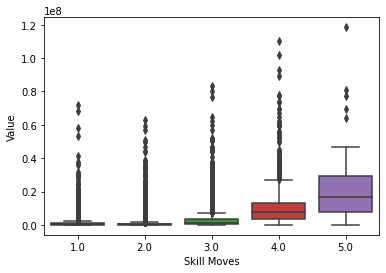

In [30]:
sns.boxplot(y="Value", x="Skill Moves", data=df)

## Чем больше финтов, тем в среднем выше стоимость

# Покажите распределеняи основных характеристик игроков: Рост, Вес, Возраст по позициям (Position), сделайте выводы...


C:\Users\tim10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



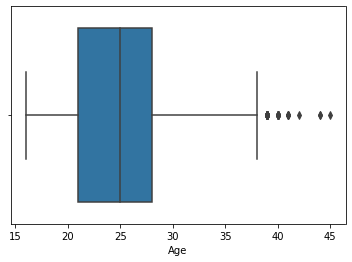

In [31]:
sns.boxplot(df['Age']);

C:\Users\tim10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



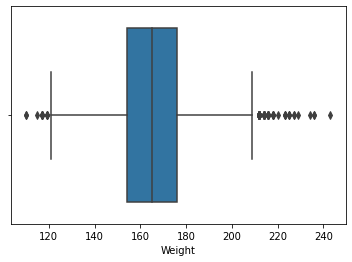

In [32]:
for i in range(df.shape[0]):
    df.loc[i, 'Weight'] = float(df['Weight'][i][0:-3])
sns.boxplot(df['Weight']);

C:\Users\tim10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



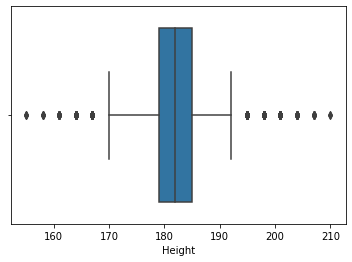

In [33]:
for i in range(df.shape[0]):
    hg = str(df['Height'][i]).split("'")
    df.loc[i, 'Height'] = int(30.48*(float(hg[0]) + float(hg[1])/10))
sns.boxplot(df['Height']);

## Основной рост от 178 до 185см, возраст от 21 до 27, вес от 155 фунтов до 175, в футбол играют молодые высокие спортивные парни

# Есть ли зависимость скорости (SprintSpeed) от веса и роста? А от национальности?  

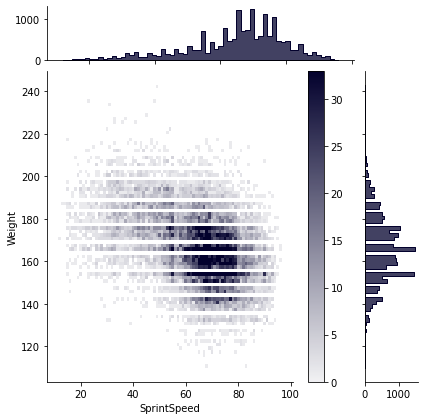

In [35]:
g = sns.JointGrid(data = df, x = 'SprintSpeed', y = 'Weight', marginal_ticks=True)
g.plot_joint(sns.histplot, discrete=(True, False), cmap="light:#03012d", pmax=.8, cbar=True)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

In [36]:
fig = px.box(df, y="SprintSpeed", x="Weight")
fig.show()

## Зависимость небольшая, но вообщем можно сказать что чем больше вес, тем сложнее быстро бешать

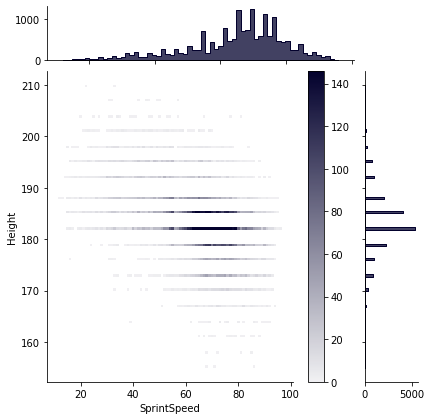

In [39]:
g = sns.JointGrid(data = df, x = 'SprintSpeed', y = 'Height', marginal_ticks=True)
g.plot_joint(sns.histplot, discrete=(True, False), cmap="light:#03012d", pmax=.8, cbar=True)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

In [40]:
fig = px.box(df, y="SprintSpeed", x="Height")
fig.show()

## Аналогично с ростом, чем выше, хотя ноги и длиннее, но бегать сложно

In [41]:
fig = px.box(df, y="SprintSpeed", x="Nationality")
fig.show()

## Судя по графику, нельзя сказать что от национальности сильно зависит скорость бега, график видоизменяется скорее из-за различного количества игроков каждой национальности и это немного искажает показания, но какого-то значительного преобладания нету (Стоп расизму, все равны)

# Под какими номерами чаще всего играют нападающие? Визуализируйте частотность  

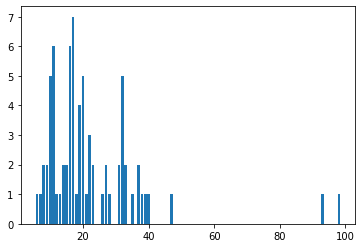

In [42]:
b = df[df['Position']=='CF'][['Jersey Number', 'ID']].groupby('Jersey Number').count().reset_index().rename(columns = {'ID':'count'})
plt.bar(x = b['Jersey Number'], height = b['count']);

## Кароче я не буду гадать этот ребус кто есть кто, для меня нападющий это Central forward, для него чаще всего берут номер от 10 до 20 или 35 +-1

# Есть ли за зависимость **силы удара** (ShotPower) от **ведущей ноги**? от **агрессивности** (Aggression)? 


In [43]:
fig = px.box(df, y="ShotPower", x="Preferred Foot")
fig.show()

## Сила удара практически не зависит от ведущей ноги

In [44]:
fig = px.box(df, y="ShotPower", x="Aggression")
fig.show()

## А вот агрессивность должна быть на уровне 30 и выше, чтобы сила удара была значительной, также заметно, что чем выше агрессивность, тем выше сила удара, но после агрессивности в 30 она не очень сильно меняется

# Найдите суммарную стоимость игроков в каждом клубе. Визуализируйте соотношение сумарной стоимости топ 10 клубов. 

In [45]:
c = df[['Club', 'Value']].groupby('Club').sum().sort_values(['Value'], ascending = False).head(10).reset_index()
c

Club      Value
0          Real Madrid  874425000
1         FC Barcelona  852600000
2      Manchester City  786555000
3             Juventus  704475000
4    FC Bayern München  679025000
5      Atlético Madrid  644525000
6  Paris Saint-Germain  625325000
7    Tottenham Hotspur  618450000
8              Chelsea  606815000
9    Manchester United  588850000

In [46]:
fig = px.bar(c, x='Club', y='Value')
fig.show()

# Есть ли зависимость между продолжительностью контракта игрока и его стоимость? 

In [101]:
df[['Joined', 'Contract Valid Until', 'Value']].head()

Joined Contract Valid Until      Value
0   2004                 2021  110500000
1   2018                 2022   77000000
2   2017                 2022  118500000
3   2011                 2020   72000000
4   2015                 2023  102000000

In [104]:
data = df[df['Contract Valid Until'].isnull() == False][df['Joined'].isnull() == False][['Joined', 'Contract Valid Until', 'Value']].reset_index(drop = True)
for i in range(data.shape[0]):
    data.loc[i, 'Contract Valid Until'] = int(data['Contract Valid Until'][i][-4:])

<ipython-input-104-fbca793e7e7f>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [105]:
data = pd.DataFrame({'col1' : data['Contract Valid Until'] - data['Joined'], 'col2' : data['Value']})

In [114]:
fig = px.box(data, y="col2", x="col1")
fig.show()

In [122]:
px.bar(data.groupby('col1').count().reset_index(), x='col1', y='col2')

### Прямой зависимости между стоимость и продолжительностью нету

# В какой год будет больше всего свободных игроков на рынке (исходя из этих данных)? визуализируйте зависимость 

In [124]:
data = df[df['Contract Valid Until'].isnull() == False][df['Joined'].isnull() == False][['Joined', 'Contract Valid Until']].reset_index(drop = True)
for i in range(data.shape[0]):
    data.loc[i, 'Contract Valid Until'] = int(data['Contract Valid Until'][i][-4:])
data.head()

<ipython-input-124-7556e14637e0>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Joined Contract Valid Until
0   2004                 2021
1   2018                 2022
2   2017                 2022
3   2011                 2020
4   2015                 2023

In [128]:
sl = {}
for i in range(data['Joined'].min(), data['Contract Valid Until'].max()+1):
    sl[i] = 0
for i in range(data.shape[0]):
    for j in range(data['Joined'][i], data['Contract Valid Until'][i]+1):
        if (j > data['Joined'][i] and j < data['Contract Valid Until'][i]):
            sl[j] += 1
sl

{1991: 0,
 1992: 1,
 1993: 1,
 1994: 1,
 1995: 1,
 1996: 1,
 1997: 1,
 1998: 1,
 1999: 4,
 2000: 5,
 2001: 7,
 2002: 9,
 2003: 19,
 2004: 32,
 2005: 44,
 2006: 61,
 2007: 79,
 2008: 117,
 2009: 170,
 2010: 248,
 2011: 379,
 2012: 580,
 2013: 920,
 2014: 1378,
 2015: 2196,
 2016: 3532,
 2017: 5778,
 2018: 9468,
 2019: 10949,
 2020: 6922,
 2021: 2562,
 2022: 1085,
 2023: 32,
 2024: 9,
 2025: 2,
 2026: 0}

In [137]:
px.bar(pd.DataFrame(sl, index = ['cnt']).T.reset_index().rename(columns = {'index' : 'year'}), x = 'year', y = 'cnt')

### Бог его знает когда они начали и закончили карьеру, но могу сказать точно, что в 2019 многие были заняты

# Есть ли зависмость потенциала (Potential) игрока от возраста? Всегда ли молодые игроки обладают большим потенциалом? 

In [138]:
fig = px.box(df, y="Potential", x="Age")
fig.show()

## После 24 потенциал в среднем немного падает и до 35 почти не пеняется, после имеет странное поведение, ввиду малой выборки наверное

# Есть ли зависимость рейтинга игрока (Overall) от возраста? Когда у игроков "пик" карьеры? Игроков какого возраста больше всего с рейтингом 90+?  

In [139]:
fig = px.box(df, y="Overall", x="Age")
fig.show()

## Можно сказать что Пик карьеры у многих с 27 до 34

# Насколько средняя зарплата (Wage) игроков с рейтингом (Overall) 90+ больше средней зарплаты с рейтингом [80 - 90]? Визуализируйте возможную зависимость

In [142]:
for i in range(df['Wage'].shape[0]):
    ev = df['Wage'][i][0]
    kf = df['Wage'][i][-1]
    if kf == 'K' or kf == 'M':
        nm = df['Wage'][i][1:-1].split('.')
    else:
        nm = df['Wage'][i][1:].split('.')
    ch = 0
    if (len(nm) == 2):
        ch = int(nm[0]) + (int(nm[1]) * 1.0) / 10**(len(nm[1]))
    elif (len(nm) == 1):
        ch = int(nm[0])
    mn = 0
    if kf == 'M':
        mn = 1000000
    elif kf == 'K':
        mn = 1000
    df.loc[i, 'Wage'] = int(mn*ch)

In [147]:
th = [df[df['Overall'] > 90]['Wage'].mean()]

In [148]:
th.append(df[90 > df['Overall']][80 < df['Overall']]['Wage'].mean())

<ipython-input-148-a95fe2e316f8>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [158]:
px.bar(pd.DataFrame({'sz' : th}).reset_index(), x = 'index', y = 'sz')

## У группы с рейтингом 90+ зарплаты примерно в 4 раза больше